<a href="https://colab.research.google.com/github/aless820/2022_ML_Earth_Env_Sci/blob/main/Final_Projet_Alessandro_Giovanardi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Projet perso ML - Alessandro Giovanardi

# Week 2 pour linear regression
# Week 3 pour random forest

import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving LGS1_2021.xlsx to LGS1_2021.xlsx
Saving LGS2_2021.xlsx to LGS2_2021.xlsx


In [2]:
# data1 = pd.read_mat(io.bytesIO(uploaded['LGS1_2021.mat']))
import pandas as pd
#data1  = io.loadmat('LGS1_2021.mat')
#data2  = io.loadmat('LGS2_2021.mat')

data1 = pd.read_excel(io.BytesIO(uploaded['LGS1_2021.xlsx']))
data2 = pd.read_excel(io.BytesIO(uploaded['LGS2_2021.xlsx']))

print(data1)
print(data2)

             T         C         Q        QC
0      162.451  0.000000  4.764942  0.000000
1      162.455  0.000000  4.887735  0.000000
2      162.458  0.000000  4.635561  0.000000
3      162.462  0.000000  4.642283  0.000000
4      162.465  0.000000  4.657201  0.000000
...        ...       ...       ...       ...
28755  271.389  0.735456  1.416233  1.041578
28756  271.396  0.735529  1.449361  1.066046
28757  271.403  0.735792  1.365839  1.004973
28758  271.410  0.742492  1.318856  0.979239
28759  271.417  0.746504  1.352499  1.009646

[28760 rows x 4 columns]
             T2        C2        Q2        QC2
0      162.0014  3.332620  4.798892  15.992883
1      162.0028  3.323299  4.747039  15.775827
2      162.0042  3.314662  4.711818  15.618087
3      162.0056  3.313449  4.688602  15.535443
4      162.0069  3.299437  4.719484  15.571641
...         ...       ...       ...        ...
28755  201.9389  1.618829  7.173662  11.612928
28756  201.9403  1.610163  7.246648  11.668286
28757  201.

In [3]:
# Normalized input variables

from sklearn.preprocessing import MinMaxScaler
import statistics
import numpy as np

# mean
meanC = np.mean(data1['C'])
meanQ = np.mean(data1['Q'])
meanC2 = np.mean(data2['C2'])
meanQ2 = np.mean(data2['Q2'])
print('Mean of C before normalisation:',round(meanC,2))
print('Mean of Q before normalisation:',round(meanQ,2))
print('Mean of C2 before normalisation:',round(meanC2,2))
print('Mean of Q2 before normalisation:',round(meanQ2,2))

# standard deviation
std_C = np.std(data1['C'])
std_Q = np.std(data1['Q'])
std_C2 = np.std(data2['C2'])
std_Q2 = np.std(data2['Q2'])
print("Standard deviation of C : " + str(round(std_C,2)))
print("Standard deviation of Q : " + str(round(std_Q,2)))
print("Standard deviation of C2 : " + str(round(std_C2,2)))
print("Standard deviation of Q2 : " + str(round(std_Q2,2)))

# MIN MAX SCALING
minmax_scale = MinMaxScaler().fit(data1[['C','Q']])
df_minmax = minmax_scale.transform(data1[['C', 'Q']])

print('\n********** Normalisation1*********\n')

print('Mean after the Min max Scaling:\nC={:.2f}, Q={:.2f}'
.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))

print('Minimum and maximum value for feature C after min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,0].min(), df_minmax[:,0].max()))

print('Minimum and maximum value for feature Q after min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax[:,1].min(), df_minmax[:,1].max()))

# nomalisation of the second data
minmax_scale2 = MinMaxScaler().fit(data2[['C2','Q2']])
df_minmax2 = minmax_scale.transform(data2[['C2', 'Q2']])

print('\n********** Normalisation2*********\n')
 
print('Mean after the Min max Scaling :\nC2={:.2f}, Q2={:.2f}'
.format(df_minmax2[:,0].mean(), df_minmax2[:,1].mean()))

print('Minimum and maximum value for feature C2 after min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax2[:,0].min(), df_minmax2[:,0].max()))

print('Minimum and maximum value for feature Q2 after min max scaling: \nMIN={:.2f}, MAX={:.2f}'
.format(df_minmax2[:,1].min(), df_minmax2[:,1].max()))

Mean of C before normalisation: 1.54
Mean of Q before normalisation: 4.96
Mean of C2 before normalisation: 1.61
Mean of Q2 before normalisation: 6.35
Standard deviation of C : 0.91
Standard deviation of Q : 1.93
Standard deviation of C2 : 1.03
Standard deviation of Q2 : 2.15

********** Normalisation1*********

Mean after the Min max Scaling:
C=0.16, Q=0.45
Minimum and maximum value for feature C after min max scaling: 
MIN=0.00, MAX=1.00
Minimum and maximum value for feature Q after min max scaling: 
MIN=0.00, MAX=1.00

********** Normalisation2*********

Mean after the Min max Scaling :
C2=0.17, Q2=0.57
Minimum and maximum value for feature C2 after min max scaling: 
MIN=-0.01, MAX=0.96
Minimum and maximum value for feature Q2 after min max scaling: 
MIN=0.26, MAX=1.24


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- C2
- Q2
Feature names seen at fit time, yet now missing:
- C
- Q

  warnings.warn(message, FutureWarning)


In [4]:
# splitting the data into train, test, valid
from sklearn.model_selection import train_test_split
import numpy as np

# set % of data to be used for training
train_size=.80

# set % of data to be used for validation and test
test_size=.20
test_size2 = .50

rnd_seed = 42

X = data1.drop(['T','QC'], axis=1)
y = data2.drop(['T2','C2','Q2'],axis=1)

#X = data2.drop(['T2','QC2'], axis=1)
#y = data1.drop(['T','C','Q'],axis=1)

# Standard deviation
X_st_dev = np.std(X)
y_st_dev = np.std(y)
#print("Standard deviation of X : " + str(X_st_dev))
#print("Standard deviation of y : " + str(y_st_dev))

# split into train, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size, random_state = rnd_seed)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = test_size2, random_state = rnd_seed)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Instantiate the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)
Prediction = lin_reg.predict(X_valid)
print('prediction is :', Prediction)
print('the thruth is :', y_valid)
print('The coefficient are :',lin_reg.coef_)

# accuracy
accuracy = lin_reg.score(X_train,y_train)
print( 'Linear regression Accuracy :', round(accuracy,6)*100,'%')

# predicting the accuracy score
score=r2_score(y_valid,Prediction)
print('r2 score is :',round(score,3))
print('mean_squared_error is :',mean_squared_error(y_valid,Prediction))
print('root_mean_squared error of is :',np.sqrt(mean_squared_error(y_valid,Prediction)))

prediction is : [[14.24984528]
 [10.83398986]
 [13.49077335]
 ...
 [11.38275398]
 [16.99656762]
 [11.1014221 ]]
the thruth is :              QC2
10761   9.088298
19737  14.284008
17049   0.000000
25909   2.530185
27572   4.700440
...          ...
6480   45.120551
19670  15.312965
15583   2.792058
7427   35.268947
13819   9.079440

[2876 rows x 1 columns]
The coefficient are : [[0.54802811 1.10557561]]
Linear regression Accuracy : 5.1878 %
r2 score is : 0.046
mean_squared_error is : 117.8628688897328
root_mean_squared error of is : 10.856466685332425


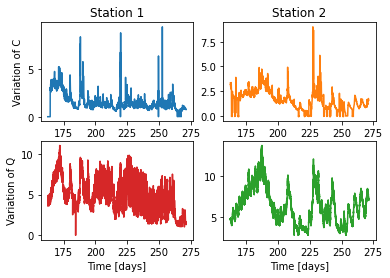

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.subplot(221)
plt.plot(data1['T'],data1['C'])
plt.ylabel('Variation of C')
plt.title('Station 1')

plt.subplot(222)
plt.plot(data1['T'],data2['C2'],'tab:orange')
#plt.ylabel('Varaition of C2')
plt.title('Station 2')

plt.subplot(223)
plt.plot(data1['T'],data1['Q'],'tab:red')
plt.xlabel('Time [days]')
plt.ylabel('Variation of Q')

plt.subplot(224)
plt.plot(data1['T'],data2['Q2'],'tab:green')
plt.xlabel('Time [days]')
#plt.ylabel('Varaition of Q2')

plt.savefig("High resoltion.png",dpi=300)

In [6]:
#from sklearn.utils import validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Train all the classifiers you imported on the *training* set
RFC = RandomForestRegressor(n_estimators = 100, random_state = 42)
RFC.fit(X_train,y_train)

# Compare their accuracy on the *validation* set
RFC_pred = RFC.predict(X_test)

# accuracy
accuracy = RFC.score(X_train,y_train)
print( 'Random forest Accuracy ', accuracy*100,'%')

# predicting the accuracy score
score=r2_score(y_test,RFC_pred)
print('The coefficient are :',RFC.feature_importances_)

print('r2 score is :',round(score,2))
print('mean_sqrd_error is :',mean_squared_error(y_test,RFC_pred))
print('root_mean_squared error of is :',np.sqrt(mean_squared_error(y_test,RFC_pred)))


#mean_squared_error sur predict et aussi sur le train à la toute fin aussi sur le test.
#table sur improtance chaque paramètre
# accuracy des train, test, validation 
# grid search avec paramètre qui font sens a testet


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Random forest Accuracy  89.7201619467103 %
The coefficient are : [0.5086612 0.4913388]
r2 score is : 0.3
mean_sqrd_error is : 79.43905385408571
root_mean_squared error of is : 8.912858904643656


TypeError: ignored

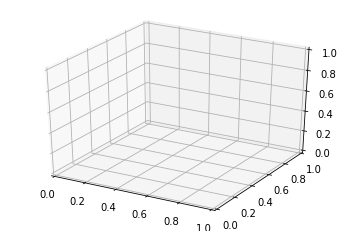

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# I never managed to finish this part


def f(x, y):
    return x * y
# Z = np.linspace(0,28759)
x = data1['C']
y = data1['Q']
# X, Y = np.meshgrid(x, y)
Z = f(x,y)

# plot QC en fonction de Q et C


#X2, Y2 = np.meshgrid(X, y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, y, Z)
#ax.contour3D(X, y, Z)
#ax.contour3D(X, y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');